SAMRefiner
=====

**SAMRefiner: Taming Segment Anything Model for Universal Mask Refinement**

 * Paper: https://arxiv.org/abs/2502.06756

![SAMRefiner Overview](../assets/samrefiner_overview.jpg)

 * Installation

```bash
git clone https://github.com/linyq2117/SAMRefiner.git SAMRefiner_repo

# create conda env
conda create -n SAMRefiner python=3.8 -y
conda activate SAMRefiner

# install packages
pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 --extra-index-url https://download.pytorch.org/whl/cu113
pip install opencv-python tqdm matplotlib scipy
pip install FastGeodis --no-build-isolation --no-cache-dir

cd SAMRefiner_repo/segment-anything; pip install -e .; cd ../../
```

* Download model checkpoint

```bash
wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O SAMRefiner_repo/checkpoints
```

In [6]:
import os
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
sys.path.append("SAMRefiner_repo")
from segment_anything import sam_model_registry
from sam_refiner import sam_refiner

In [3]:
model_type = "vit_h"
sam_checkpoint = "SAMRefiner_repo/checkpoints/sam_vit_h_4b8939.pth"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.eval().to(device=device);

In [7]:


image_path = "../samples/plants.jpg"
mask_path = "<path/to/init_mask>"
img = np.asarray(Image.open(image_path))
if os.path.exists(mask_path):
    init_masks = np.asarray(Image.open(mask_path), dtype=np.uint8)
else:
    init_masks = np.random.randint(0, 2, size=img.shape[:2], dtype=np.uint8)

if np.max(init_masks) == 255:
    init_masks = init_masks / 255

refined_masks = sam_refiner(
    image_path, [init_masks], sam
)[0]
                            
print(refined_masks.shape)

pred_mask = Image.fromarray(255*refined_masks[0].astype(np.uint8))
pred_mask.size

(1, 1137, 1068)


(1068, 1137)

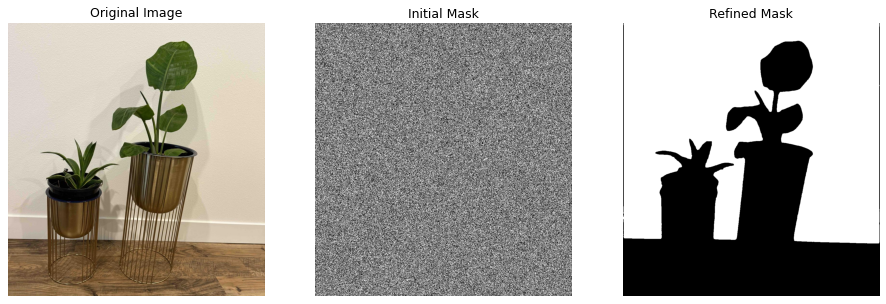

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=75)
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(init_masks, cmap='gray')
axes[1].set_title("Initial Mask")
axes[1].axis('off')
axes[2].imshow(refined_masks[0], cmap='gray')
axes[2].set_title("Refined Mask")
axes[2].axis('off')
plt.show()